<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9634 - val_loss: 0.9757
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8895 - val_loss: 0.8099
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6686 - val_loss: 0.6694
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5741 - val_loss: 0.5452
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4450 - val_loss: 0.4416
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3108 - val_loss: 0.3540
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2584 - val_loss: 0.2797
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2105 - val_loss: 0.2188
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1905 - val_loss: 0.1694
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1443 - val_loss: 0.1325
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0879 - val_loss: 0.1045
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0892 - val_l

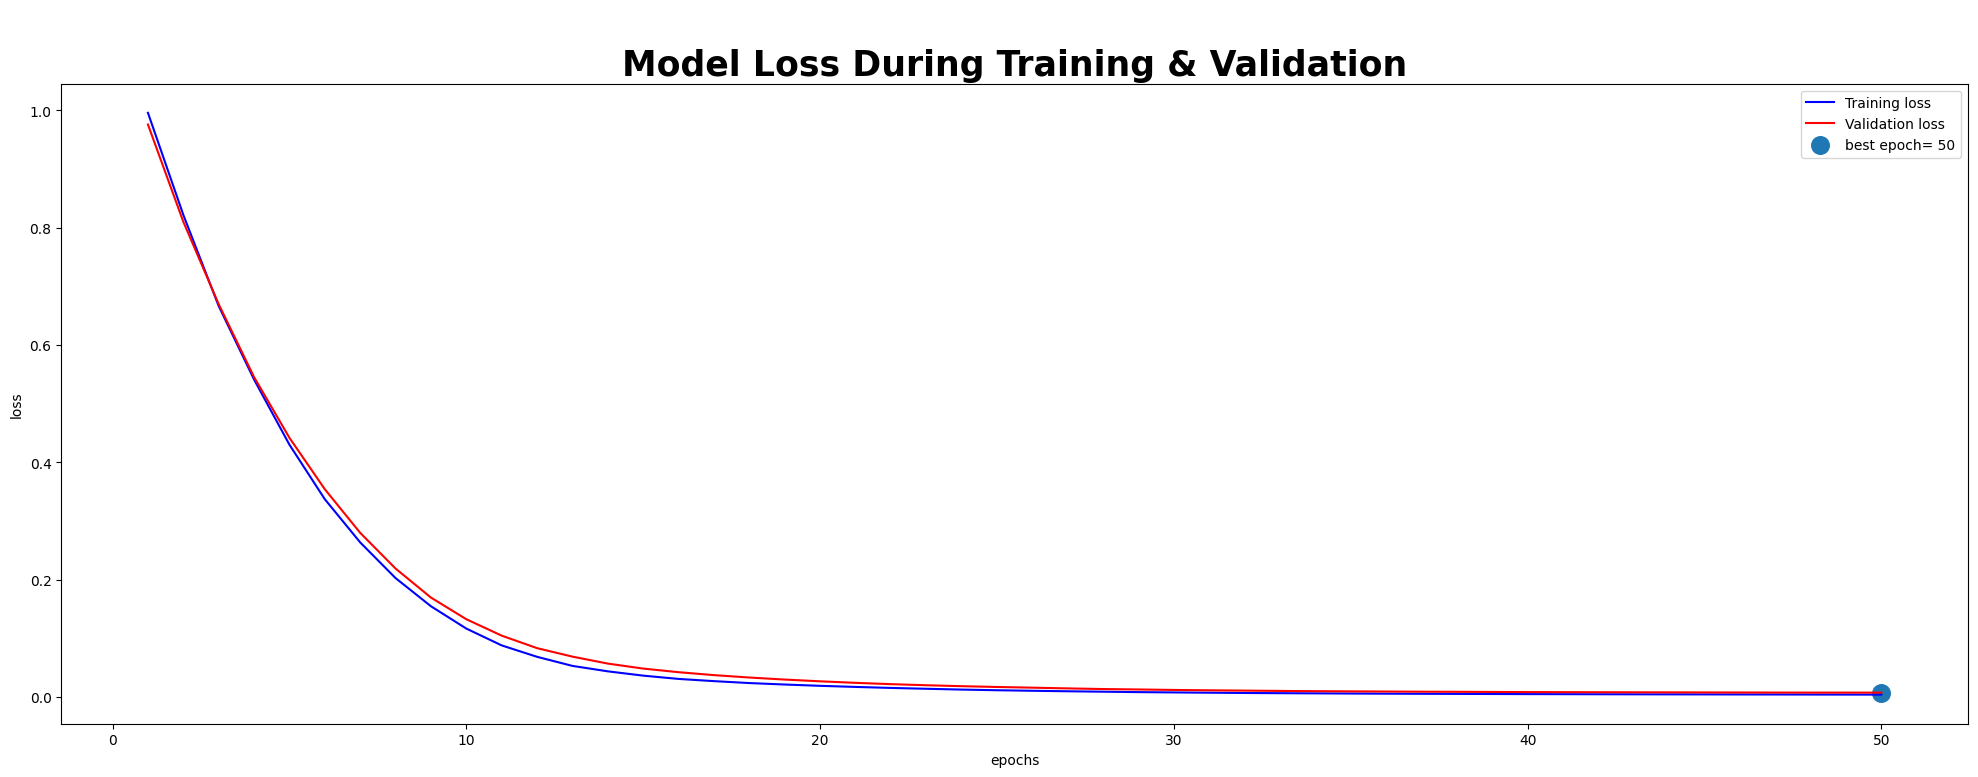

In [ ]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Read Data
df=pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')
df.sample(5)
df.info()

#missing data check
df.isnull().sum()
df.duplicated().sum()
df.shape
df.nunique()

#data preprocessing
#drop unneeded columns
df.drop(columns=["customer name","customer e-mail","country","gender"],inplace=True)
df.describe()

#define features x and target y
x=df.drop("car purchase amount",axis=1)
y=df[["car purchase amount"]]
x
y

#data scaling
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

#split data into test and train
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.2,random_state=0)
x.shape[1]

#ANN model
model=Sequential(

    [Dense(32,activation="relu",input_dim=4),

    Dense(1,activation="linear")])


model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()
history=model.fit(x_tr,y_tr,epochs=50,validation_split=0.2)
history.history.keys()
plt.figure(figsize=(20,8))

tr_loss=history.history["loss"]
val=history.history["val_loss"]
Epochs=[i+1 for i in range(len(val))]

plt.plot(Epochs, tr_loss,"b", label= 'Training loss')
plt.plot(Epochs, val,"r" ,label= 'Validation loss')


index=np.argmin(val)
loss=val[index]

plt.scatter(index+1,loss
            ,label= f'best epoch= {index+ 1}'
            ,s=160)
plt.title('\nModel Loss During Training & Validation',fontsize=25,fontweight='bold')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()
plt.style.use('fivethirtyeight')
plt.tight_layout();

#prediction
y_pred=model.predict(x_tst)
MSE=mean_squared_error(y_tst,y_pred)
R2=r2_score(y_tst,y_pred)

print("MSE:",MSE)
print("R2 SCORE:",R2)

threshold = 0.1  # Define a threshold for accuracy

# Calculate the percentage of predictions within the threshold
accuracy = np.mean(np.abs(y_pred - y_tst) <= threshold) * 100

print("Accuracy within threshold:", accuracy, "%")